#One way ANOVA
One-Way ANOVA (Analysis of Variance) is a statistical technique used to compare the means of three or more independent groups to determine if there is a statistically significant difference between them. It is called "one-way" because it examines the effect of a single independent variable (factor) on a dependent variable.

In [1]:
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew
from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from   scipy.stats import chi2_contingency   # For Chi-Sq

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riyabangera","key":"d5a92cf8021850a75165fe9784b5720b"}'}

In [3]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 31.2MB/s]


In [5]:
!unzip insurance.zip

Archive:  insurance.zip
  inflating: insurance.csv           


In [6]:
import pandas as pd
df=pd.read_csv("insurance.csv")
insured=df.copy()

we will be using hypothesis testing to determine if the mean BMI of women with no children, one child, and two children are the same.

Step 1: Define null and alternative hypotheses * H0: μ1 = μ2 = μ3 The mean BMI of women with no children , one child,two children is same
* Ha: Atleast one of mean BMI of women is not same

Step 2: Decide the significance level
α = 0.05

Step 3: Identify Test
One-way ANOVA - Equality of population through variances of samples.

Step 4: Calculate the test-statistics and p-value

In [8]:
df_female = df[df['sex'] == 'female'] # Creating df_female by filtering 'df' for female records

# Filtering data of only women with 0, 1 and 2 children
df_female_child = df_female.loc[df_female['children']<=2]
df_female_child.head()

age     sex    bmi  children smoker     region      charges
0    19  female  27.90         0    yes  southwest  16884.92400
5    31  female  25.74         0     no  southeast   3756.62160
6    46  female  33.44         1     no  southeast   8240.58960
9    60  female  25.84         0     no  northwest  28923.13692
11   62  female  26.29         0    yes  southeast  27808.72510

In [9]:
# Filtering data of only women with 0, 1 and 2 children
df_female_child = df_female.loc[df_female['children']<=2]
df_female_child.head()

age     sex    bmi  children smoker     region      charges
0    19  female  27.90         0    yes  southwest  16884.92400
5    31  female  25.74         0     no  southeast   3756.62160
6    46  female  33.44         1     no  southeast   8240.58960
9    60  female  25.84         0     no  northwest  28923.13692
11   62  female  26.29         0    yes  southeast  27808.72510

In [13]:
#pd.pivot_table(data=df_female_filtered,index=df_female_filtered.children,columns=df_female_filtered.bmi,values=df_female_filtered.bmi,fill_value=0)
df_female_child.groupby([df_female_child.children])['bmi'].mean()

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

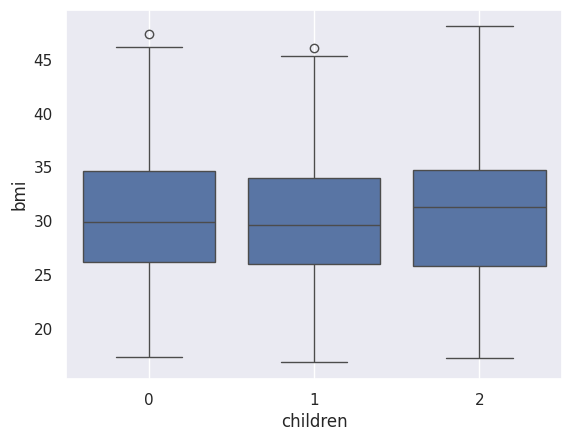

In [11]:
# Women BMI with children 0, 1, 2;
sns.boxplot(x="children", y="bmi", data=df_female_child)
plt.grid()
plt.show()

In [14]:
# Applying ANOVA and cheking each children count (0,1,2) with the bmi;
formula = 'bmi ~ C(children)'
model = ols(formula, df_female_child).fit()
aov_table = anova_lm(model)
aov_table

df        sum_sq    mean_sq         F    PR(>F)
C(children)    2.0     24.590123  12.295062  0.334472  0.715858
Residual     563.0  20695.661583  36.759612       NaN       NaN

Step 5: Decide to reject or accept null hypothesis
P value is 0.715858 and it is greater than aplha(0.05) ,We failed to reject the null hypothesis and conclude that mean Bmi of women with no children,one children, two children is same.